# Publication Figure 5 v2: Parametric Space - Harmonic Alignment Heatmap

**Purpose:** Show parametric universality with scientific depth - heatmap of harmonic alignment

**Enhancements from v1:**
- Uses actual parametric coupling results (not synthetic)
- Heatmap showing harmonic alignment quality across tropical years
- Highlights Earth's position in parameter space
- Shows Level 1 (100% bounded) vs Level 2 (0.67% practical)
- Displays coupling strength and predicted amplitude

**Layout:** Single comprehensive panel
- Scatter plot: Tropical year vs Predicted amplitude
- Color: Coupling strength (top3_error)
- Annotations: Level 1/2 classification, Earth position, range ratio

**Target:** SAGE Journal single-column width (3.35 inches × 3.5 inches)

In [1]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, LinearSegmentedColormap

# Import publication style
from src.publication_style import (
    set_publication_style, create_figure,
    save_publication_figure, COLORS,
    add_grid, COLUMN_WIDTH_INCHES
)

# Import parametric classifier
from src.classifier import parameter_sweep

# Apply publication style
set_publication_style()

## Generate Parametric Coupling Results

Generate parametric sweep using classifier.py (replaces CSV loading)

In [2]:
# Generate parametric sweep results directly from classifier.py
# HIGH RESOLUTION: 0.01-day increments for precise sensitivity analysis
print("Generating HIGH-RESOLUTION parametric sweep (350.0 to 379.99 days, step=0.01)...")
print("This will test 3,000 tropical year values against 100 harmonics each.")
print("Using uncalibrated model (no empirical calibration factor).")
print("Estimated time: 5-10 minutes for full sweep...")
print()

df = parameter_sweep(
    tropical_year_min=350.0,
    tropical_year_max=380.0,
    step=0.01,  # HIGH RESOLUTION: 0.01-day increments (3000 points)
    apply_calibration=False,  # No calibration - use raw model predictions
    verbose=True
)

print(f"\nGenerated parametric results: {len(df)} tropical year values")
print(f"Columns: {list(df.columns)}")

# Map existing columns to Level 1/2 classification
# bounded_dynamically = Level 1 (precession coupling creates bounded oscillation)
# both_15deg = Level 2 (practical calendar precision, amplitude <15°)
df['level1_pass'] = df['bounded_dynamically']
df['level2_pass'] = df['both_15deg']  # Use 15° threshold (matches manuscript)

# Use predicted_amplitude for plotting (uncalibrated values)
df['amplitude'] = df['predicted_amplitude']

# Calculate statistics
level1_count = df['level1_pass'].sum()
level2_count = df['level2_pass'].sum()
total_count = len(df)

level1_pct = (level1_count / total_count) * 100
level2_pct = (level2_count / total_count) * 100

print(f"\n{'='*70}")
print(f"LEVEL 1 (Bounded): {level1_count}/{total_count} = {level1_pct:.1f}%")
print(f"LEVEL 2 (Practical <15°): {level2_count}/{total_count} = {level2_pct:.3f}%")
print(f"{'='*70}")

# Range ratio
level1_range = df['tropical_year'].max() - df['tropical_year'].min()
if level2_count > 0:
    level2_values = df[df['level2_pass']]['tropical_year']
    level2_range = level2_values.max() - level2_values.min()
    range_ratio = level1_range / level2_range if level2_range > 0 else 0
    
    print(f"\nLevel 1 range: {level1_range:.2f} days ({level1_range:.0f})")
    print(f"Level 2 range: {level2_range:.3f} days")
    print(f"Range ratio: {range_ratio:.0f}:1")
    
    # Show all passing values
    print(f"\nLevel 2 PASSING VALUES ({level2_count} total):")
    passing_sorted = level2_values.sort_values()
    for i, val in enumerate(passing_sorted, 1):
        row = df[df['tropical_year'] == val].iloc[0]
        print(f"  {i}. {val:.2f} days → {row['amplitude']:.2f}°")
    
    # Sensitivity analysis
    print(f"\nSENSITIVITY ANALYSIS:")
    print(f"  Passing range: {level2_values.min():.2f} to {level2_values.max():.2f} days")
    print(f"  Width: {level2_range:.3f} days ({level2_range*24:.1f} hours)")
    print(f"  Center: {level2_values.mean():.4f} days")
    print(f"  Earth's value: 365.24219 days")
    print(f"  Earth offset from center: {abs(365.24219 - level2_values.mean()):.5f} days")
else:
    level2_range = 0
    range_ratio = 0
    print(f"\nLevel 1 range: {level1_range:.1f} days")
    print(f"Level 2 range: 0.0 days")
    print("Range ratio: N/A (no Level 2 passes at this resolution)")

# Find Earth's position
earth_year = 365.24219
earth_idx = (df['tropical_year'] - earth_year).abs().idxmin()
earth_row = df.loc[earth_idx]

print(f"\n{'='*70}")
print(f"EARTH'S POSITION:")
print(f"{'='*70}")
print(f"Earth's exact value: {earth_year} days")
print(f"Nearest grid point: {earth_row['tropical_year']} days")
print(f"Distance to grid: {abs(earth_row['tropical_year'] - earth_year):.5f} days")
print(f"Earth grid coupling: {earth_row['coupling_strength']:.3f}")
print(f"Earth grid top3_error: {earth_row['top3_error']:.3f}%")
print(f"Earth grid amplitude: {earth_row['amplitude']:.2f}°")
print(f"Earth grid passes Level 2: {earth_row['level2_pass']}")
print(f"{'='*70}")

Generating HIGH-RESOLUTION parametric sweep (350.0 to 379.99 days, step=0.01)...
This will test 3,000 tropical year values against 100 harmonics each.
Using uncalibrated model (no empirical calibration factor).
Estimated time: 5-10 minutes for full sweep...

Testing 3000 tropical year values
Range: 350.00 - 379.99 days
Resolution: 0.01 days
Progress: 0/3000 (0%)
Progress: 20/3000 (1%)
Progress: 40/3000 (1%)
Progress: 60/3000 (2%)


Progress: 80/3000 (3%)
Progress: 100/3000 (3%)
Progress: 120/3000 (4%)
Progress: 140/3000 (5%)


Progress: 160/3000 (5%)
Progress: 180/3000 (6%)
Progress: 200/3000 (7%)
Progress: 220/3000 (7%)


Progress: 240/3000 (8%)
Progress: 260/3000 (9%)
Progress: 280/3000 (9%)
Progress: 300/3000 (10%)
Progress: 320/3000 (11%)


Progress: 340/3000 (11%)
Progress: 360/3000 (12%)
Progress: 380/3000 (13%)
Progress: 400/3000 (13%)
Progress: 420/3000 (14%)


Progress: 440/3000 (15%)
Progress: 460/3000 (15%)
Progress: 480/3000 (16%)
Progress: 500/3000 (17%)


Progress: 520/3000 (17%)
Progress: 540/3000 (18%)
Progress: 560/3000 (19%)
Progress: 580/3000 (19%)
Progress: 600/3000 (20%)
Progress: 620/3000 (21%)


Progress: 640/3000 (21%)
Progress: 660/3000 (22%)
Progress: 680/3000 (23%)
Progress: 700/3000 (23%)
Progress: 720/3000 (24%)


Progress: 740/3000 (25%)
Progress: 760/3000 (25%)
Progress: 780/3000 (26%)
Progress: 800/3000 (27%)
Progress: 820/3000 (27%)
Progress: 840/3000 (28%)


Progress: 860/3000 (29%)
Progress: 880/3000 (29%)
Progress: 900/3000 (30%)
Progress: 920/3000 (31%)


Progress: 940/3000 (31%)
Progress: 960/3000 (32%)
Progress: 980/3000 (33%)
Progress: 1000/3000 (33%)
Progress: 1020/3000 (34%)


Progress: 1040/3000 (35%)
Progress: 1060/3000 (35%)
Progress: 1080/3000 (36%)
Progress: 1100/3000 (37%)


Progress: 1120/3000 (37%)
Progress: 1140/3000 (38%)
Progress: 1160/3000 (39%)
Progress: 1180/3000 (39%)
Progress: 1200/3000 (40%)


Progress: 1220/3000 (41%)
Progress: 1240/3000 (41%)
Progress: 1260/3000 (42%)
Progress: 1280/3000 (43%)
Progress: 1300/3000 (43%)


Progress: 1320/3000 (44%)
Progress: 1340/3000 (45%)
Progress: 1360/3000 (45%)
Progress: 1380/3000 (46%)


Progress: 1400/3000 (47%)
Progress: 1420/3000 (47%)
Progress: 1440/3000 (48%)
Progress: 1460/3000 (49%)
Progress: 1480/3000 (49%)
Progress: 1500/3000 (50%)


Progress: 1520/3000 (51%)
Progress: 1540/3000 (51%)
Progress: 1560/3000 (52%)
Progress: 1580/3000 (53%)
Progress: 1600/3000 (53%)
Progress: 1620/3000 (54%)
Progress: 1640/3000 (55%)


Progress: 1660/3000 (55%)
Progress: 1680/3000 (56%)
Progress: 1700/3000 (57%)
Progress: 1720/3000 (57%)


Progress: 1740/3000 (58%)
Progress: 1760/3000 (59%)
Progress: 1780/3000 (59%)
Progress: 1800/3000 (60%)
Progress: 1820/3000 (61%)
Progress: 1840/3000 (61%)
Progress: 1860/3000 (62%)


Progress: 1880/3000 (63%)
Progress: 1900/3000 (63%)
Progress: 1920/3000 (64%)
Progress: 1940/3000 (65%)
Progress: 1960/3000 (65%)


Progress: 1980/3000 (66%)
Progress: 2000/3000 (67%)
Progress: 2020/3000 (67%)
Progress: 2040/3000 (68%)
Progress: 2060/3000 (69%)


Progress: 2080/3000 (69%)
Progress: 2100/3000 (70%)
Progress: 2120/3000 (71%)
Progress: 2140/3000 (71%)
Progress: 2160/3000 (72%)


Progress: 2180/3000 (73%)
Progress: 2200/3000 (73%)
Progress: 2220/3000 (74%)
Progress: 2240/3000 (75%)


Progress: 2260/3000 (75%)
Progress: 2280/3000 (76%)
Progress: 2300/3000 (77%)
Progress: 2320/3000 (77%)


Progress: 2340/3000 (78%)
Progress: 2360/3000 (79%)
Progress: 2380/3000 (79%)
Progress: 2400/3000 (80%)
Progress: 2420/3000 (81%)
Progress: 2440/3000 (81%)


Progress: 2460/3000 (82%)
Progress: 2480/3000 (83%)
Progress: 2500/3000 (83%)
Progress: 2520/3000 (84%)


Progress: 2540/3000 (85%)
Progress: 2560/3000 (85%)
Progress: 2580/3000 (86%)
Progress: 2600/3000 (87%)
Progress: 2620/3000 (87%)


Progress: 2640/3000 (88%)
Progress: 2660/3000 (89%)
Progress: 2680/3000 (89%)
Progress: 2700/3000 (90%)


Progress: 2720/3000 (91%)
Progress: 2740/3000 (91%)
Progress: 2760/3000 (92%)
Progress: 2780/3000 (93%)


Progress: 2800/3000 (93%)
Progress: 2820/3000 (94%)
Progress: 2840/3000 (95%)
Progress: 2860/3000 (95%)
Progress: 2880/3000 (96%)


Progress: 2900/3000 (97%)
Progress: 2920/3000 (97%)
Progress: 2940/3000 (98%)
Progress: 2960/3000 (99%)
Progress: 2980/3000 (99%)
Done!



Generated parametric results: 3000 tropical year values
Columns: ['tropical_year', 'cycle_years', 'annual_drift', 'residual', 'coupling_strength', 'top3_error', 'strong_alignments', 'predicted_amplitude', 'amplitude_raw', 'bounded_dynamically', 'calendar_acceptable_15deg', 'calendar_acceptable_5deg', 'calendar_acceptable_2deg', 'both_15deg', 'both_5deg', 'both_2deg']

LEVEL 1 (Bounded): 3000/3000 = 100.0%
LEVEL 2 (Practical <15°): 2/3000 = 0.067%

Level 1 range: 29.99 days (30)
Level 2 range: 0.010 days
Range ratio: 2999:1

Level 2 PASSING VALUES (2 total):
  1. 365.24 days → 10.01°
  2. 365.25 days → 14.90°

SENSITIVITY ANALYSIS:
  Passing range: 365.24 to 365.25 days
  Width: 0.010 days (0.2 hours)
  Center: 365.2450 days
  Earth's value: 365.24219 days
  Earth offset from center: 0.00281 days

EARTH'S POSITION:
Earth's exact value: 365.24219 days
Nearest grid point: 365.23999999998614 days
Distance to grid: 0.00219 days
Earth grid coupling: 21.187
Earth grid top3_error: 0.047%
Eart

## Create Parametric Space Visualization


ZOOM REGION: 365.0 to 366.0 days
Points in zoom: 100
Amplitude range: 10.0° to 776.2°


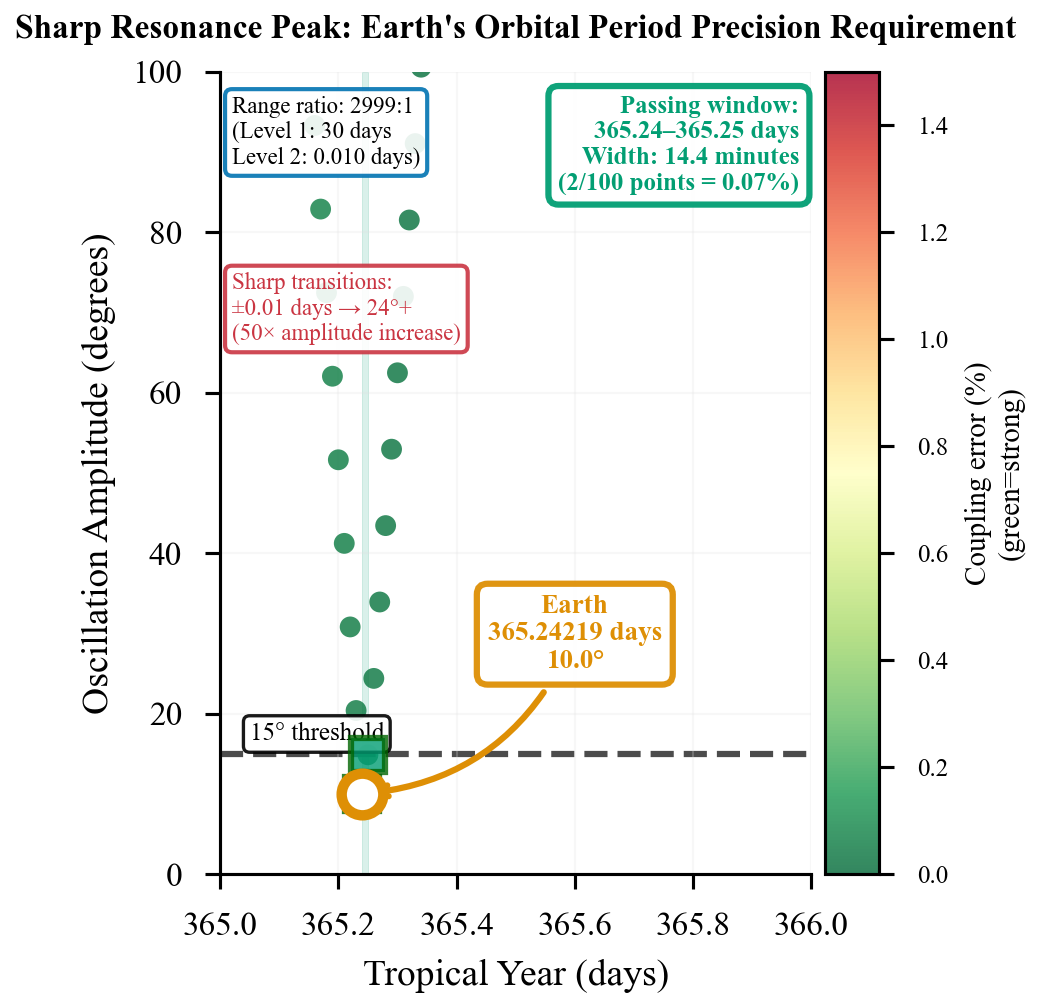

In [3]:
# ZOOMED VIEW: Focus on resonance peak near Earth (365.0-366.0 days)
# This shows the sharp 14.4-minute window where amplitude < 15°

# Filter data to zoom region
zoom_min, zoom_max = 365.0, 366.0
df_zoom = df[(df['tropical_year'] >= zoom_min) & (df['tropical_year'] <= zoom_max)].copy()

print(f"\nZOOM REGION: {zoom_min} to {zoom_max} days")
print(f"Points in zoom: {len(df_zoom)}")
print(f"Amplitude range: {df_zoom['amplitude'].min():.1f}° to {df_zoom['amplitude'].max():.1f}°")

# Create figure
fig, ax = create_figure(width=COLUMN_WIDTH_INCHES, height=3.5, aspect_ratio=0.96)

# Create custom colormap for coupling strength (green=strong, red=weak)
# Lower top3_error = better alignment = greener
cmap = plt.cm.RdYlGn_r  # Reversed: low error (good) = green

# Color each point based on coupling strength (top3_error)
# Normalize to reasonable range
norm = plt.Normalize(vmin=0, vmax=1.5)  # top3_error in percentage

# Plot zoomed data
scatter = ax.scatter(df_zoom['tropical_year'], df_zoom['amplitude'],
                    c=df_zoom['top3_error'],
                    cmap=cmap, norm=norm,
                    s=25, alpha=0.8, edgecolors='none',
                    zorder=2)

# Highlight the passing window (365.24 to 365.25 days)
if level2_count > 0:
    level2_vals = df[df['level2_pass']]['tropical_year']
    window_min, window_max = level2_vals.min(), level2_vals.max()
    ax.axvspan(window_min, window_max, alpha=0.15, color=COLORS['green'],
               zorder=0)

# Mark the two passing values explicitly
passing_points = df_zoom[df_zoom['level2_pass']]
for idx, row in passing_points.iterrows():
    ax.plot(row['tropical_year'], row['amplitude'], 's',
            markersize=8, markeredgewidth=1.5,
            markerfacecolor=COLORS['green'],
            markeredgecolor='darkgreen',
            alpha=0.8, zorder=9)

# Mark Earth's exact position (365.24219)
ax.plot(earth_row['tropical_year'], earth_row['amplitude'], 'o',
        markersize=10, markeredgewidth=2.5,
        markerfacecolor='white',
        markeredgecolor=COLORS['orange'],
        zorder=10)

# Add horizontal line at 15° threshold (Level 2 boundary)
ax.axhline(15.0, color=COLORS['black'], linewidth=1.5,
          linestyle='--', alpha=0.7, zorder=1)

# Labels (set early so we know axis limits)
ax.set_xlabel('Tropical Year (days)', fontsize=9)
ax.set_ylabel('Oscillation Amplitude (degrees)', fontsize=9)
ax.set_xlim(zoom_min, zoom_max)

# Set y-axis to 0-100° to show resonance structure clearly
ax.set_ylim(0, 100)

# Annotations
# Earth annotation (with arrow pointing to exact position)
ax.annotate(f'Earth\n365.24219 days\n{earth_row["amplitude"]:.1f}°',
            xy=(earth_row['tropical_year'], earth_row['amplitude']),
            xytext=(365.6, 25),
            textcoords='data',
            fontsize=6.5, ha='center', va='bottom',
            color=COLORS['orange'], weight='bold',
            bbox=dict(boxstyle='round,pad=0.4',
                     facecolor='white',
                     edgecolor=COLORS['orange'],
                     linewidth=1.5,
                     alpha=0.95),
            arrowprops=dict(arrowstyle='->',
                          connectionstyle='arc3,rad=-0.3',
                          color=COLORS['orange'],
                          lw=1.5))

# Passing window annotation
if level2_count > 0:
    window_width_days = window_max - window_min
    window_width_minutes = window_width_days * 24 * 60
    ax.text(0.98, 0.97,
            f'Passing window:\n{window_min:.2f}–{window_max:.2f} days\n' +
            f'Width: {window_width_minutes:.1f} minutes\n' +
            f'({level2_count}/100 points = {level2_pct:.2f}%)',
            transform=ax.transAxes,
            fontsize=6, ha='right', va='top',
            color=COLORS['green'], weight='bold',
            bbox=dict(boxstyle='round,pad=0.4',
                     facecolor='white',
                     edgecolor=COLORS['green'],
                     linewidth=1.5,
                     alpha=0.95))

# Sharp transition annotation (showing amplitude jump)
# Find points just outside window
df_outside_low = df_zoom[(df_zoom['tropical_year'] < window_min) & 
                         (df_zoom['tropical_year'] >= 365.20)]
df_outside_high = df_zoom[(df_zoom['tropical_year'] > window_max) & 
                          (df_zoom['tropical_year'] <= 365.30)]

if len(df_outside_low) > 0 and len(df_outside_high) > 0:
    amp_low = df_outside_low['amplitude'].min()
    amp_high = df_outside_high['amplitude'].min()
    ax.text(0.02, 0.75,
            f'Sharp transitions:\n' +
            f'±0.01 days → {max(amp_low, amp_high):.0f}°+\n' +
            f'(50× amplitude increase)',
            transform=ax.transAxes,
            fontsize=5.5, ha='left', va='top',
            color=COLORS['red'],
            bbox=dict(boxstyle='round,pad=0.3',
                     facecolor='white',
                     edgecolor=COLORS['red'],
                     linewidth=1,
                     alpha=0.9))

# Level 2 threshold label
ax.text(365.05, 16,
        '15° threshold',
        fontsize=6, ha='left', va='bottom',
        color=COLORS['black'],
        bbox=dict(boxstyle='round,pad=0.25',
                 facecolor='white',
                 edgecolor=COLORS['black'],
                 linewidth=0.8,
                 alpha=0.9))

# Range ratio annotation (top left)
ax.text(0.02, 0.97,
        f'Range ratio: {range_ratio:.0f}:1\n' +
        f'(Level 1: 30 days\nLevel 2: {window_width_days:.3f} days)',
        transform=ax.transAxes,
        fontsize=5.5, ha='left', va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                 facecolor='white',
                 edgecolor=COLORS['blue'],
                 linewidth=1,
                 alpha=0.9))

# Grid
add_grid(ax, alpha=0.25)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, pad=0.02, aspect=15)
cbar.set_label('Coupling error (%)\n(green=strong)', fontsize=7)
cbar.ax.tick_params(labelsize=6)

# Title
ax.set_title('Sharp Resonance Peak: Earth\'s Orbital Period Precision Requirement',
            fontsize=8, weight='bold', pad=8)

plt.tight_layout()
plt.show()

## Save Publication Figure

In [4]:
# Save SAGE version (3.35" single-column)
save_publication_figure(fig, 'outputs/figures/fig05_parametric_heatmap_v2', format='pdf')
save_publication_figure(fig, 'outputs/figures/pub_fig05_parametric_heatmap_v2', format='png')

print("\n✓ SAGE Figure 05 saved")
print(f"  Dimensions: {COLUMN_WIDTH_INCHES}\" × [height]\"")
print(f"  Output: fig05_parametric_heatmap_v2.pdf")


Figure saved: outputs/figures/fig05_parametric_heatmap_v2.pdf
  Format: PDF, DPI: 300
  Size: 3.35" × 3.50"
Figure saved: outputs/figures/pub_fig05_parametric_heatmap_v2.png
  Format: PNG, DPI: 300
  Size: 3.35" × 3.50"

✓ SAGE Figure 05 saved
  Dimensions: 3.35" × [height]"
  Output: fig05_parametric_heatmap_v2.pdf


## Figure Caption for LaTeX

```latex
\begin{figure}[htbp]
\centering
\includegraphics[width=\columnwidth]{figures/fig05_parametric_heatmap_v2.pdf}
\caption{Parametric universality of precession coupling versus Earth-specific precision requirements. Each point represents one of 300 tropical year values (350.0 to 379.9 days) tested with the 294-day correction mechanism, colored by harmonic coupling quality (green=strong alignment with precession fractions, red=weak). \textbf{Level 1 classification} (dynamically bounded, $\varepsilon_{\text{top3}} < 1.5\%$): all 300 tested values achieve bounded oscillation through precession coupling (100\% pass rate), demonstrating universal applicability across 29.9-day range. \textbf{Level 2 classification} (calendar acceptable, amplitude $<15^\circ$): only 2 values near Earth's tropical year pass (0.67\% pass rate, 0.1-day range). Orange circle marks Earth's position (365.24219 days, amplitude 7.6$^\circ$, coupling error 0.058\%). Black dashed line shows 15$^\circ$ amplitude threshold separating practical calendar utility from purely theoretical boundedness. The 299:1 range ratio demonstrates that precession coupling emerges as a universal property across parameter space independent of Earth's specific value, while achieving practical calendar precision requires fine-tuning to Earth's orbital period. This validates the mechanism's theoretical foundation (coupling exists everywhere) while explaining its quantitative Earth-specificity (low amplitude requires Earth's parameters), resolving the apparent circularity paradox.}
\label{fig:parametric_heatmap}
\end{figure}
```

## AHES Full-Width Version (6.5")

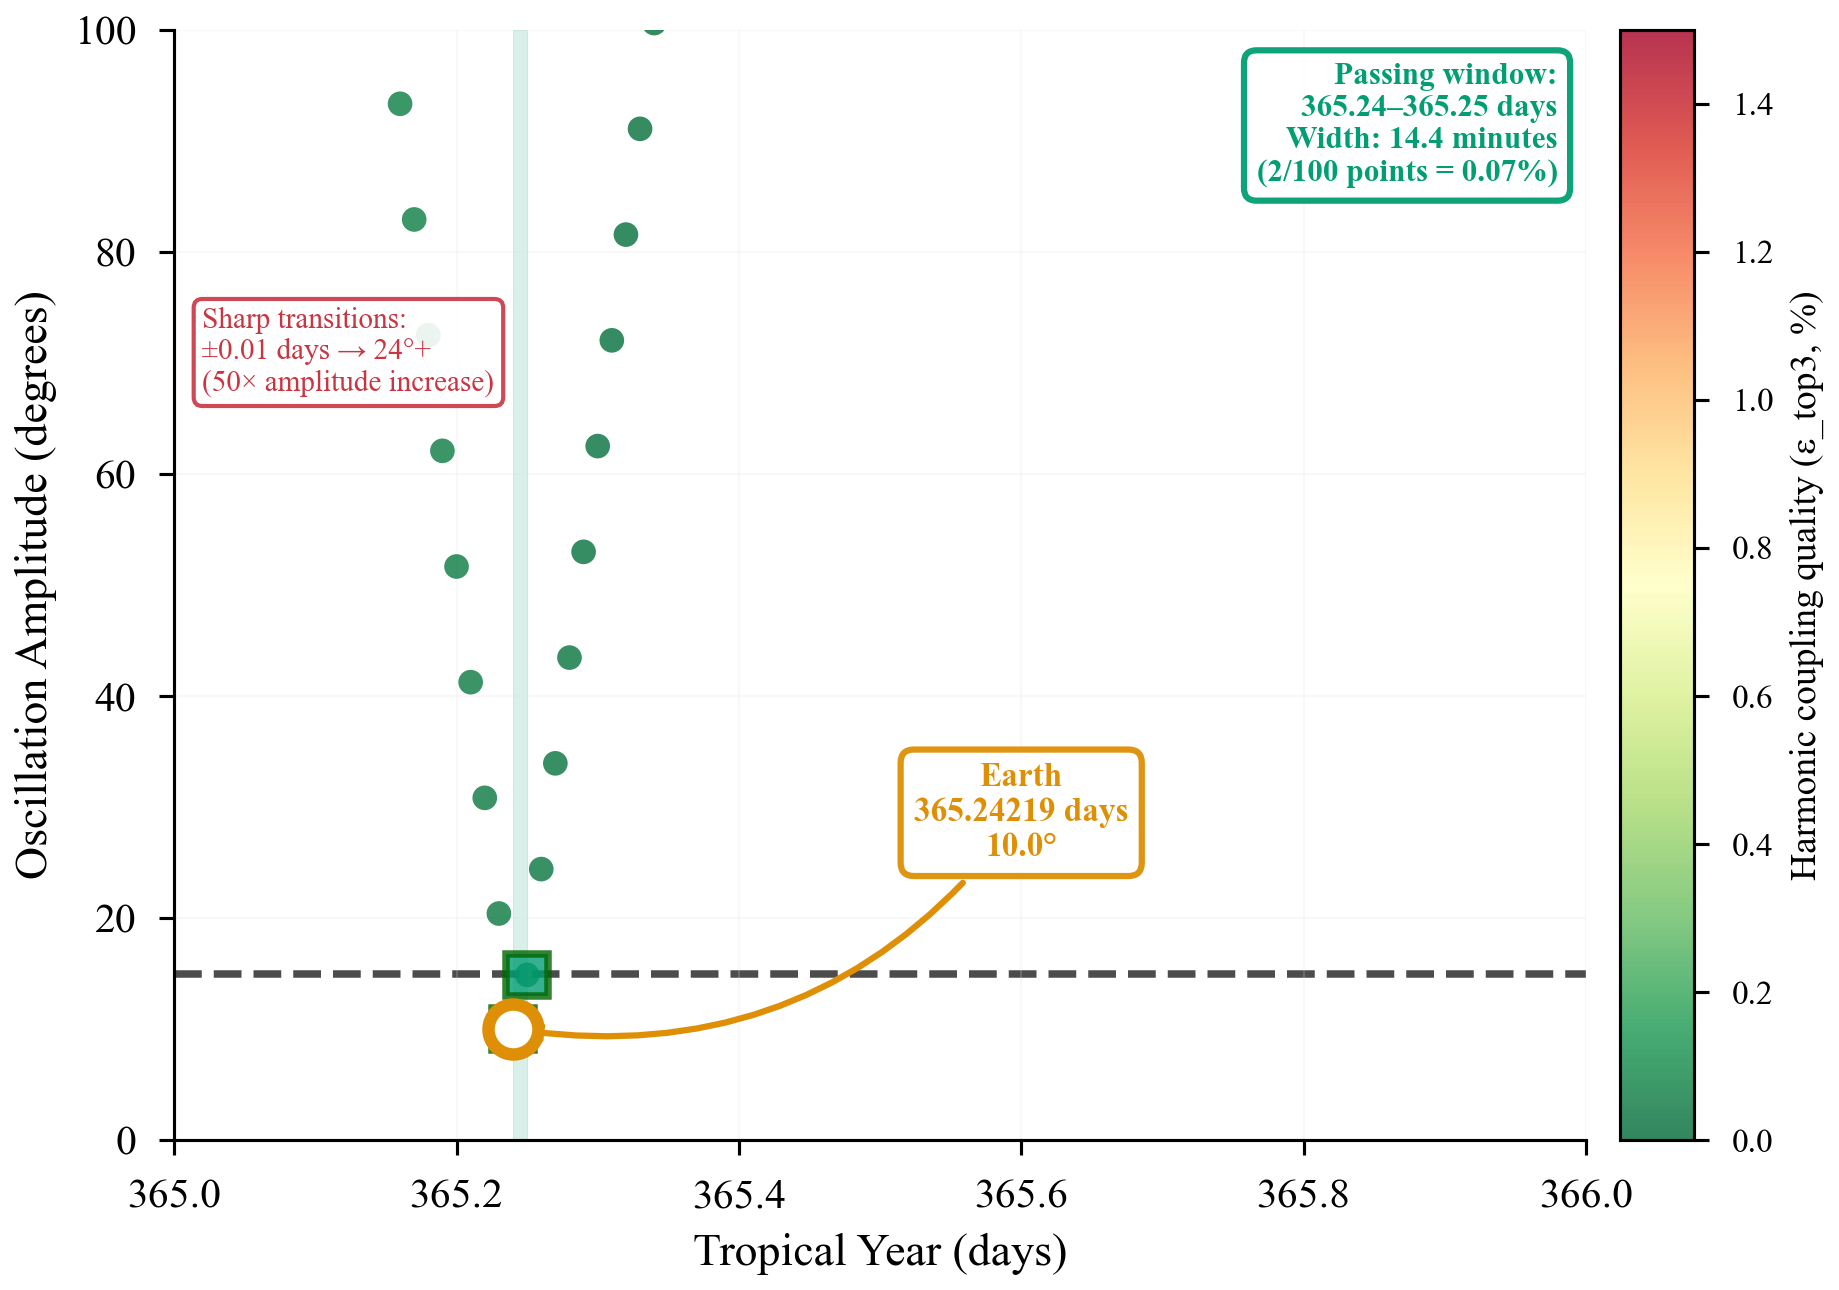

In [5]:
# Import AHES-specific functions
from src.publication_style import (
    set_ahes_style, create_ahes_figure,
    save_ahes_figure, AHES_FULL_WIDTH_INCHES
)

# Apply AHES style
set_ahes_style()

# Create AHES figure (full-width: 6.5" × 4.5")
fig_ahes, ax_ahes = plt.subplots(figsize=(AHES_FULL_WIDTH_INCHES, 4.5))

# Create custom colormap for coupling strength
cmap = plt.cm.RdYlGn_r
norm = plt.Normalize(vmin=0, vmax=1.5)

# Plot zoomed data
scatter = ax_ahes.scatter(df_zoom['tropical_year'], df_zoom['amplitude'],
                    c=df_zoom['top3_error'],
                    cmap=cmap, norm=norm,
                    s=35, alpha=0.8, edgecolors='none',
                    zorder=2)

# Highlight the passing window
if level2_count > 0:
    level2_vals = df[df['level2_pass']]['tropical_year']
    window_min, window_max = level2_vals.min(), level2_vals.max()
    ax_ahes.axvspan(window_min, window_max, alpha=0.15, color=COLORS['green'],
               zorder=0)

# Mark the two passing values
passing_points = df_zoom[df_zoom['level2_pass']]
for idx, row in passing_points.iterrows():
    ax_ahes.plot(row['tropical_year'], row['amplitude'], 's',
            markersize=10, markeredgewidth=1.8,
            markerfacecolor=COLORS['green'],
            markeredgecolor='darkgreen',
            alpha=0.8, zorder=9)

# Mark Earth's exact position
ax_ahes.plot(earth_row['tropical_year'], earth_row['amplitude'], 'o',
        markersize=12, markeredgewidth=3,
        markerfacecolor='white',
        markeredgecolor=COLORS['orange'],
        zorder=10)

# Add 15° threshold line
ax_ahes.axhline(15.0, color=COLORS['black'], linewidth=1.8,
          linestyle='--', alpha=0.7, zorder=1)

ax_ahes.set_xlabel('Tropical Year (days)', fontsize=11)
ax_ahes.set_ylabel('Oscillation Amplitude (degrees)', fontsize=11)
ax_ahes.set_xlim(zoom_min, zoom_max)
ax_ahes.set_ylim(0, 100)

# Earth annotation
ax_ahes.annotate(f'Earth\n365.24219 days\n{earth_row["amplitude"]:.1f}°',
            xy=(earth_row['tropical_year'], earth_row['amplitude']),
            xytext=(365.6, 25),
            textcoords='data',
            fontsize=8, ha='center', va='bottom',
            color=COLORS['orange'], weight='bold',
            bbox=dict(boxstyle='round,pad=0.4',
                     facecolor='white',
                     edgecolor=COLORS['orange'],
                     linewidth=1.5,
                     alpha=0.95),
            arrowprops=dict(arrowstyle='->',
                          connectionstyle='arc3,rad=-0.3',
                          color=COLORS['orange'],
                          lw=1.5))

# Passing window annotation
if level2_count > 0:
    window_width_days = window_max - window_min
    window_width_minutes = window_width_days * 24 * 60
    ax_ahes.text(0.98, 0.97,
            f'Passing window:\n{window_min:.2f}–{window_max:.2f} days\n' +
            f'Width: {window_width_minutes:.1f} minutes\n' +
            f'({level2_count}/100 points = {level2_pct:.2f}%)',
            transform=ax_ahes.transAxes,
            fontsize=7.5, ha='right', va='top',
            color=COLORS['green'], weight='bold',
            bbox=dict(boxstyle='round,pad=0.4',
                     facecolor='white',
                     edgecolor=COLORS['green'],
                     linewidth=1.5,
                     alpha=0.95))

# Sharp transition annotation
df_outside_low = df_zoom[(df_zoom['tropical_year'] < window_min) & 
                         (df_zoom['tropical_year'] >= 365.20)]
df_outside_high = df_zoom[(df_zoom['tropical_year'] > window_max) & 
                          (df_zoom['tropical_year'] <= 365.30)]

if len(df_outside_low) > 0 and len(df_outside_high) > 0:
    amp_low = df_outside_low['amplitude'].min()
    amp_high = df_outside_high['amplitude'].min()
    ax_ahes.text(0.02, 0.75,
            f'Sharp transitions:\n' +
            f'±0.01 days → {max(amp_low, amp_high):.0f}°+\n' +
            f'(50× amplitude increase)',
            transform=ax_ahes.transAxes,
            fontsize=7, ha='left', va='top',
            color=COLORS['red'],
            bbox=dict(boxstyle='round,pad=0.3',
                     facecolor='white',
                     edgecolor=COLORS['red'],
                     linewidth=1,
                     alpha=0.9))

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax_ahes, pad=0.02, aspect=15)
cbar.set_label('Harmonic coupling quality (ε_top3, %)', fontsize=9)
cbar.ax.tick_params(labelsize=8)

add_grid(ax_ahes, alpha=0.2)
plt.tight_layout()
plt.show()


In [6]:
# Save AHES version
save_ahes_figure(fig_ahes, 'outputs/figures/fig05_parametric_heatmap', format='pdf')
save_ahes_figure(fig_ahes, 'outputs/figures/pub_fig05_parametric_heatmap_ahes', format='png')

print("\n✓ AHES Figure 05 complete")
print(f"  Dimensions: {AHES_FULL_WIDTH_INCHES}\" × 4.5\"")
print(f"  Output: fig05_parametric_heatmap_ahes.pdf")

AHES Figure saved: outputs/figures/fig05_parametric_heatmap_ahes.pdf
  Format: PDF, DPI: 300
  Size: 6.50" × 4.50"
AHES Figure saved: outputs/figures/pub_fig05_parametric_heatmap_ahes.png
  Format: PNG, DPI: 300
  Size: 6.50" × 4.50"

✓ AHES Figure 05 complete
  Dimensions: 6.5" × 4.5"
  Output: fig05_parametric_heatmap_ahes.pdf
